# 6.1 Supervised Machine Learning

# Index
1. Importing Libraries and data
2. Data Cleaning
3. Visualizing Variables
4. Data Prep for Regression Analysis
5. Regression Analysis


# 1. Importing Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display charts
%matplotlib inline

In [3]:
# path to data folder
path = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 6\Data\Prepared Data'

In [4]:
# Import data
gv = pd.read_csv(os.path.join(path, 'Gun Violence Clean.csv'))

In [5]:
# Check
gv.head(15)

,Unnamed: 0,incident_id,date,state,city_or_county,number_killed,number_injured,latitude,longitude
0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559
1,1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330
2,2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377
3,3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020
4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569
5,5,478948,1/7/2013,Oklahoma,Tulsa,4,0,36.2405,-95.9768
6,6,479363,1/19/2013,New Mexico,Albuquerque,5,0,34.9791,-106.7160
7,7,479374,1/21/2013,Louisiana,New Orleans,0,5,29.9435,-90.0836
8,8,479389,1/21/2013,California,Brentwood,0,4,37.9656,-121.7180
9,9,492151,1/23/2013,Maryland,Baltimore,1,6,39.2899,-76.6412


# 2. Data Cleaning

In [6]:
gv.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'number_killed', 'number_injured', 'latitude', 'longitude'],
      dtype='object')

In [7]:
gv.shape

(239677, 9)

In [8]:
# Dropping "Unnamed : 0" column
gv = gv.drop(columns = ['Unnamed: 0'])

In [9]:
# Check
gv.head()

,incident_id,date,state,city_or_county,number_killed,number_injured,latitude,longitude
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559
1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330
2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377
3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020
4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569


In [10]:
# Check for duplicates
dups = gv.duplicated()

In [11]:
dups.shape

(239677,)

#
No duplicates

In [12]:
# Check for missing values
gv.isnull().sum()

incident_id          0
date                 0
state                0
city_or_county       0
number_killed        0
number_injured       0
latitude          7923
longitude         7923
dtype: int64

#
Missing Values in latitude and Longitude, keeping those since we still have records for the state/city on those. 

<Axes: xlabel='number_killed', ylabel='Count'>

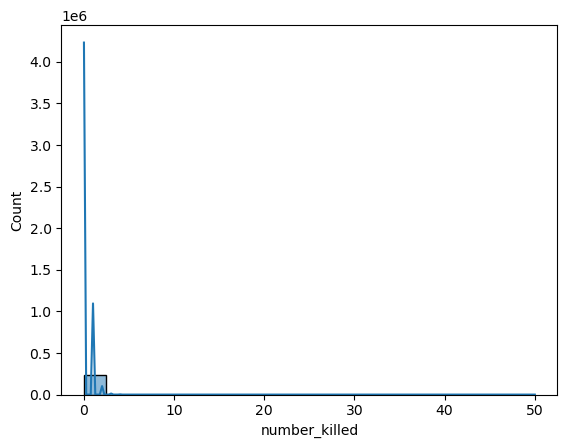

In [14]:
# Extreme Values
sns.histplot(gv['number_killed'], bins = 20, kde = True)

<Axes: xlabel='number_injured', ylabel='Count'>

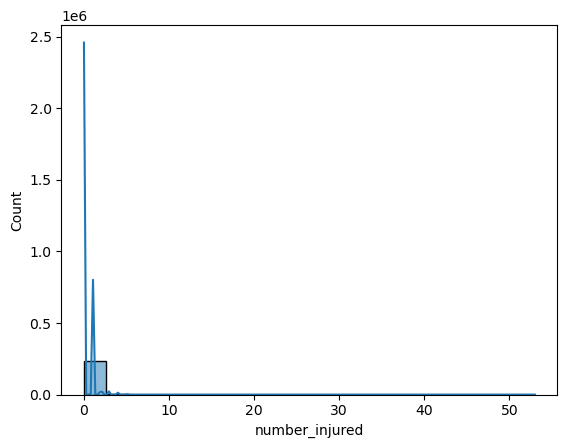

In [15]:
sns.histplot(gv['number_injured'], bins = 20, kde = True)

# 3. Visualizing Variables

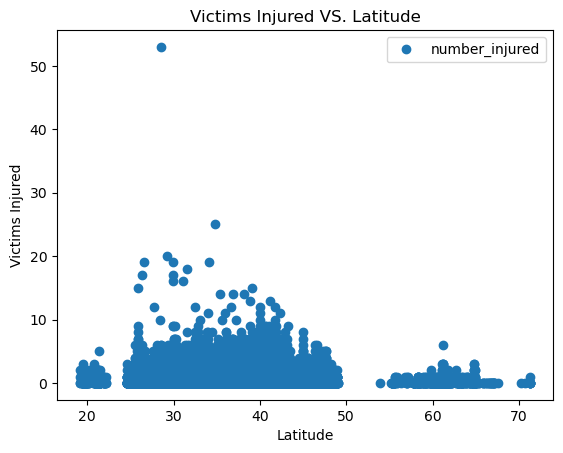

In [17]:
# Exploring variables visually with scatterplots
gv.plot( x = 'latitude', y = 'number_injured',style= 'o')
plt.title('Victims Injured VS. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Victims Injured')
plt.show()

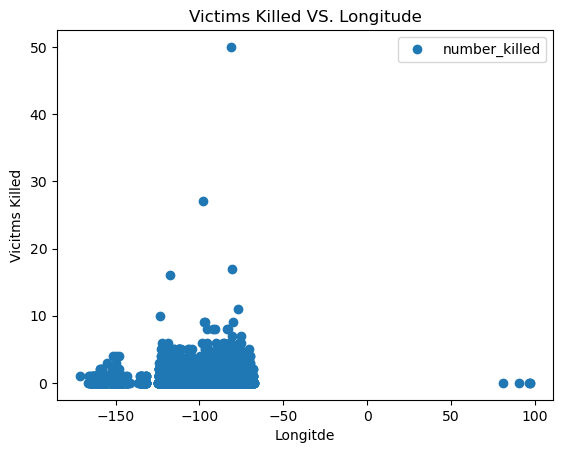

In [18]:
gv.plot(x = 'longitude', y= 'number_killed',style= 'o')
plt.title('Victims Killed VS. Longitude')
plt.xlabel('Longitde')
plt.ylabel('Vicitms Killed')
plt.show()

C:\Users\justi\AppData\Local\Temp\ipykernel_25412\259813368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gv['number_killed'], bins=20)


<Axes: xlabel='number_killed', ylabel='Density'>

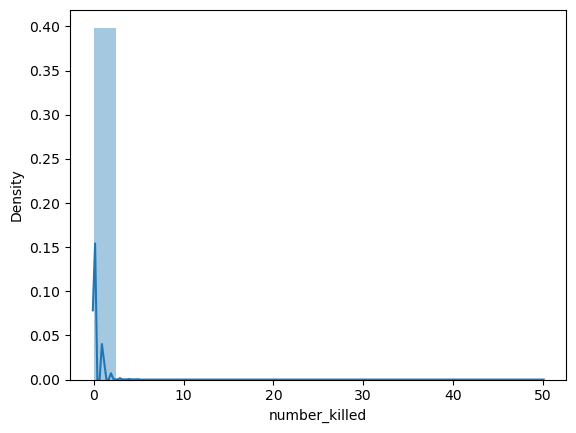

In [19]:
sns.distplot(gv['number_killed'], bins=20)

#
I will be leaving extreme values as they are actual incidents where no suspects were arrested

# 
Hypothesis
There are more victims injured by gun violence than killed

# 4. Data Prep for Regresssion Analysis

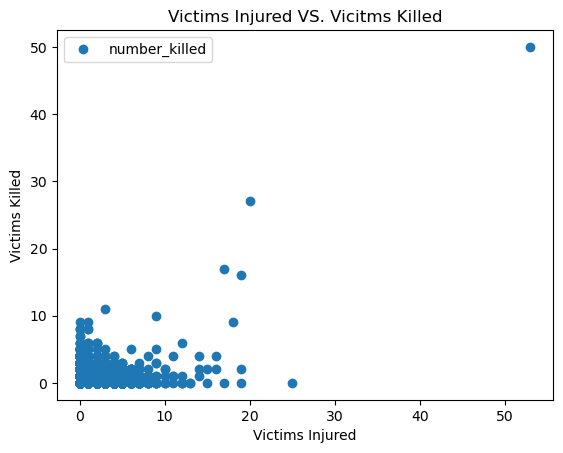

In [20]:
gv.plot(x = 'number_injured', y = 'number_killed',style= 'o')
plt.title('Victims Injured VS. Vicitms Killed')
plt.xlabel('Victims Injured')
plt.ylabel('Victims Killed')
plt.show()

In [37]:
# Reshaping variables
X = gv['number_injured'].values.reshape(-1,1)
y = gv['number_killed'].values.reshape(-1,1)

In [38]:
X

array([[4],
       [3],
       [3],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [39]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [40]:
# Splitting Data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression Analysis

In [41]:
# Create a regression object to fit onto training set
regression = LinearRegression()

In [42]:
# Fit the regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the y values using x values
y_predicted = regression.predict(X_test)

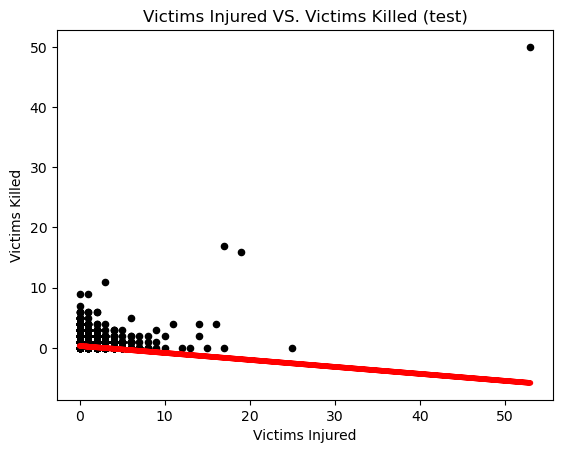

In [44]:
# Plot showing the regression line on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 20)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 4)
plot_test.title('Victims Injured VS. Victims Killed (test)')
plot_test.xlabel('Victims Injured')
plot_test.ylabel('Victims Killed')
plot_test.show()

#
The hypothesis was that there are more victims injured by gun violence than killed and the line does not appear to fit this model. 

In [45]:
rmse = mean_squared_error(y_test, y_predicted) # Mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score

In [46]:
# Model Summary Statistics
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 Score: ', r2)

Slope:  [[-0.11595093]]
Mean squared error:  0.3067910759785066
R2 Score:  -0.010443770714851697


In [47]:
y_predicted

array([[0.19241259],
       [0.19241259],
       [0.19241259],
       ...,
       [0.30836351],
       [0.19241259],
       [0.19241259]])

In [116]:
# Comparing actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,1,0.070013
1,0,0.233662
2,1,0.288211
3,0,0.233662
4,0,0.179112
5,0,0.233662
6,0,0.288211
7,0,0.233662
8,0,0.233662
9,0,0.233662


#
The Slope is -0.11595093 Indicating that there is a small negative relationship between the x and y variables

The Mean Squared Error is 0.3067910759785066 Indicating that the model was close to predicitng the number of vicitms injured which is often 0

The R2 value is -0.010443770714851697 Indicating that the model is a poor fit as it is closer to 0 than 1 and is not performing well. 

# 
I would say this model is not performing well. I don't believe there is any human bias in this data set. I think the issue is sample bias, There aren't a lot of records for this data making less records for the model to use for predictions. Although i will say that model is predicting decimals and you can't have a percentage of a person arrested.  